## Exercise

Use keras mnist dataset from https://keras.io/datasets/ to build a neural network. Figure out,

1. Optiomal number of hidden layers and neurons in each hidden layer that can give you best accuracy
2. Optional accuracy score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


### Importing Dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

## Display Images

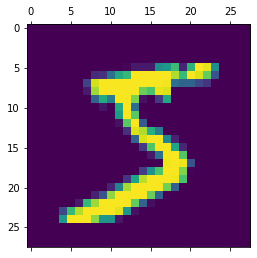

In [6]:
plt.matshow(x_train[0])

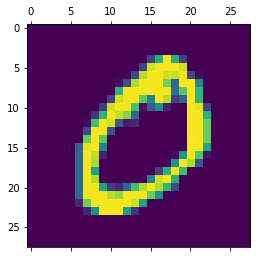

In [7]:
plt.matshow(x_train[1])

## Display Labels

In [8]:
y_train[0]

5

In [9]:
y_train[1]

0

## Normalize Data Set

In [25]:
x_train=x_train/255
x_test=x_test/255

## Keras Sequential Model

Building a linear stack of Neural Network Layer


In [26]:
from keras.models import Sequential

from keras.layers import Dense, Activation, Flatten

In [27]:
model = Sequential()

In [28]:
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(10000, activation="relu"))    
model.add(Dense(10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10000)             7850000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                100010    
Total params: 7,950,010
Trainable params: 7,950,010
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [46]:
model.fit(x_train, y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 349s 6ms/step - loss: 0.1795 - accuracy: 0.9460


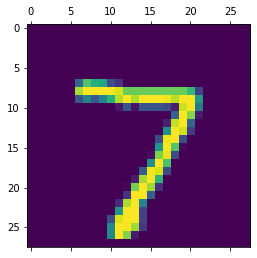

In [47]:
plt.matshow(x_test[0])

In [48]:
x_test.shape

(10000, 28, 28)

In [49]:
yp = model.predict(x_test)

In [50]:
yp[0]

array([1.4433956e-08, 4.3859663e-09, 1.0728995e-06, 7.7185541e-07,
       3.6925667e-12, 1.4456301e-08, 6.8227878e-13, 9.9999809e-01,
       4.4074682e-09, 3.6582097e-08], dtype=float32)

In [51]:
np.argmax(yp[5])

1

In [52]:
class_labels = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

In [53]:
class_labels[np.argmax(yp[0])]

'Seven'

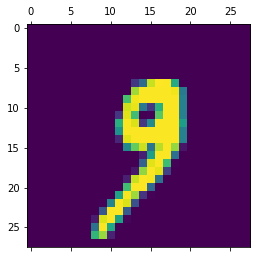

In [54]:
plt.matshow(x_test[1000])

In [55]:
yp[1000]

array([1.5443613e-06, 5.4889938e-07, 8.8679961e-09, 4.1219610e-04,
       3.2579901e-06, 1.7673984e-06, 6.9641092e-11, 1.7577919e-04,
       1.4244077e-06, 9.9940348e-01], dtype=float32)

In [56]:
np.argmax(yp[1000])

9

In [57]:
class_labels[np.argmax(yp[1000])]

'Nine'

## Accuracy

In [58]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 299us/step


[0.09864860885255039, 0.9681000113487244]

# The accuracy of out model is 96.81% and Loss is 9.8%